In [2]:
using Pkg
Pkg.activate(".")

  Activating project at `~/local_Documents/TheoryAndPracticeOfCausalInference`


In [3]:
Pkg.add(["Random", "Distributions", "GLM", "DataFrames", "StatsPlots"])
using Random, Distributions, GLM, DataFrames

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
    Updating `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`
  [88015f11] + LERC_jll v3.0.0+1
  [89763e89] ↑ Libtiff_jll v4.3.0+0 ⇒ v4.3.0+1


In [4]:
rnorm(n, μ = 0.0, σ = 1.0) = rand(Normal(μ, σ), n)

rnorm (generic function with 3 methods)

## 仮定1：誤差項の期待値ゼロ

誤差項の期待値が0のシミュレーションデータを作成して，`lm`の推定結果を確認する。

これで真値に近い推定結果が得られていれば，`lm`において当てはめているのは誤差項の期待値0を仮定したモデルであることがわかる。

In [5]:
Random.seed!(1)
n1 = 1_000
a0, b1 = 1.0, 1.5
x1 = rnorm(n1)
u1 = rnorm(n1, 10, 1)
y1 = @. a0 * x1 + u1
model1 = lm(@formula(y1 ~ x1), DataFrame(y1 = y1, x1 = x1))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y1 ~ 1 + x1

Coefficients:
────────────────────────────────────────────────────────────────────────
               Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  9.97372   0.0324032  307.80    <1e-99    9.91014   10.0373
x1           1.07459   0.03152     34.09    <1e-99    1.01273    1.13644
────────────────────────────────────────────────────────────────────────

## 仮定2：パラメタにおける線形性

パラメタが線形＝モデル中のパラメタが線形結合で表されている。

たとえば，$x_1$

$Y_{1i} = \beta_0 + \beta_1X_{1i} + \varepsilon_i$

$Y_{1i} = \beta_0 + \beta_1X_{1i} + \log(X_{2i}) + \varepsilon_i$

$Y_{1i} = \exp(\beta_0 + \beta_1X_{1i} + \varepsilon_i)$

は線形結合だが，

$\beta_0X_{2i}^{\beta_1}e^{\varepsilon_i}$

は線形結合ではない。

線形性はは最小二乗法による推定値が不偏推定量である条件でもある。

順番に見ていく。1つ目のモデル$Y_{1i} = \beta_0 + \beta_1X_{1i} + \varepsilon_i$は通常の線形回帰モデルであるため，正しい推定値が得られるはずである。

In [6]:
Pkg.add(["CSV", "HTTP"])
using CSV, HTTP

   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`


In [7]:
data07a = CSV.read(HTTP.get("https://raw.githubusercontent.com/mtakahashi123/causality/main/data07a.csv").body, DataFrame; missingstring = "")

,y1,y2,y3,y4,x1,x2
,Float64,Float64,Float64,Float64,Float64,Float64
1,2.07599,-0.955678,7.97247,0.141469,1.13497,0.41224
2,2.85154,-1.69974,17.3144,0.0672231,1.11193,0.146277
3,-1.1418,2.59392,0.319245,4.92302,-0.870778,5.05158
4,2.91138,3.37419,18.3821,10.7423,0.210732,1.6808
5,1.4336,1.24573,4.19377,1.27856,0.0693956,0.945681
6,-2.31444,1.22416,0.0988213,1.25127,-1.66265,2.00655
7,2.70369,1.5677,14.9347,1.76421,0.81084,1.05497
8,-1.13019,-0.227101,0.322971,0.293141,-1.91235,0.269744
9,-0.294349,-1.60882,0.745017,0.0736215,-1.24675,0.119664


In [8]:
describe(data07a)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,y1,0.963959,-4.85489,0.985075,8.23779,0,Float64
2,y2,1.01132,-4.32519,1.0138,6.74444,0,Float64
3,y3,19.6848,0.00779019,2.67801,3781.17,0,Float64
4,y4,5.49271,0.00486742,1.0139,312.449,0,Float64
5,x1,-0.0162619,-3.25322,-0.0344829,3.63957,0,Float64
6,x2,1.68969,0.0290253,0.994519,17.499,0,Float64


In [9]:
model1 = lm(@formula(y1 ~ x1), data07a)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y1 ~ 1 + x1

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.988455   0.0327466  30.18    <1e-99   0.924195    1.05272
x1           1.50637    0.0314996  47.82    <1e-99   1.44456     1.56818
────────────────────────────────────────────────────────────────────────

ここでは回帰係数のうち傾き（x1のパラメタ）の真値は1.5，切片の真値は1.0と設定されているため，概ね適切な推定値が得られていると判断できる。

2つ目のモデル$Y_{1i} = \beta_0 + \beta_1X_{1i} + \log(X_{2i}) + \varepsilon_i$は説明変数が対数変換されている。したがって線形回帰モデルに投入する変数もあらかじめ対数変換しておく。

Rの`lm`ならベクトルを直接モデル式に渡せるが，Juliaではデータフレームで渡す必要があるため，一時的に`transform`で対数変換した変数を作成する。

In [10]:
lm(@formula(y2 ~ lx2), transform(data07a, :x2 => ByRow(log) => :lx2))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y2 ~ 1 + lx2

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.987593   0.032707   30.20    <1e-99   0.923411    1.05178
lx2          1.54955    0.0317326  48.83    <1e-99   1.48728     1.61182
────────────────────────────────────────────────────────────────────────

In [11]:
lm(@formula(ly3 ~ x1), transform(data07a, :y3 => ByRow(log) => :ly3))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

ly3 ~ 1 + x1

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.988455   0.0327466  30.18    <1e-99   0.924195    1.05272
x1           1.50637    0.0314996  47.82    <1e-99   1.44456     1.56818
────────────────────────────────────────────────────────────────────────

In [12]:
lm(@formula(ly4 ~ lx2), transform(data07a, [:y4, :x2] .=> ByRow(log) .=> [:ly4, :lx2]))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

ly4 ~ 1 + lx2

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0124068   0.032707   -0.38    0.7045  -0.0765891  0.0517756
lx2           1.54955     0.0317326  48.83    <1e-99   1.48728    1.61182
───────────────────────────────────────────────────────────────────────────

対数変換後の係数の解釈について。

- 何も変換しない：$x_1$が1単位変化すれば，$y$は$\hat{\beta_1}$単位変化する。

これが，説明変数を対数変換すると，

- $x_1$を対数変換：$x_1$が1**％**変化すれば，$y$は$\hat{\beta_1}/100$単位変化する。

となる。

In [13]:
Pkg.add("TaylorSeries")
using TaylorSeries

   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`


In [14]:
t = Taylor1(Float64, 4)
log(1+t)

 1.0 t - 0.5 t² + 0.3333333333333333 t³ - 0.25 t⁴ + 𝒪(t⁵)

In [15]:
f(x) = log(1+t)(x)

f (generic function with 1 method)

In [16]:
log(1 + 0.1)

0.09531017980432493

In [17]:
f(0.1)

0.09530833333333333

In [18]:
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`


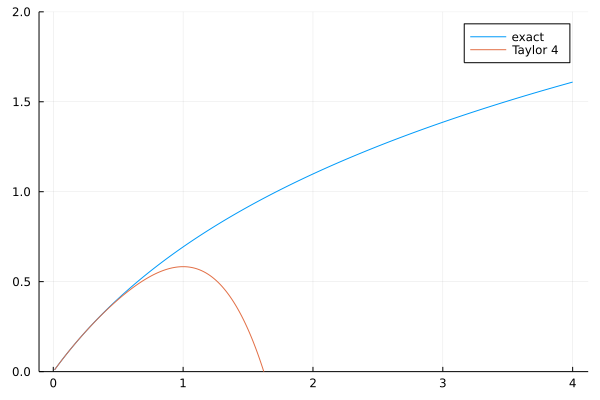

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423


In [19]:
x = collect(0.01:0.01:4)
plot(x, log.(1 .+ x), label = "exact")
plot!(x, f.(x), label = "Taylor 4")
ylims!(0, 2)

変数の線形性≠パラメタの線形性

変数における非線形性は，適切に変数変換することで，線形回帰モデルで適切に推定できるが，パラメタが線形結合でないモデルは禁止されている。

※非線形なパラメタを容易に線形に変換できないとあるが，具体的にどう努力すれば変換できるのか？